# Data Understanding


Study the data in visual format

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import subprocess
import os
import requests
import json






In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

In [3]:
df_plot=pd.read_csv('../data/processed/COVID_small_flat_table.csv')
df_plot.sort_values('date',ascending=False).head()

,date,United Kingdom,France,Germany,Canada,India,Australia
856,2022-05-27,22463243,29631816,26240639,3879660,43150215,7189926
855,2022-05-26,22458340,29626992,26200663,3874390,43147530,7157305
854,2022-05-25,22462129,29605758,26198811,3870603,43144820,7117742
853,2022-05-24,22455392,29583616,26159106,3866054,43142192,7071714
852,2022-05-23,22448854,29551335,26109965,3863979,43140068,7025922


<Figure size 1152x648 with 0 Axes>

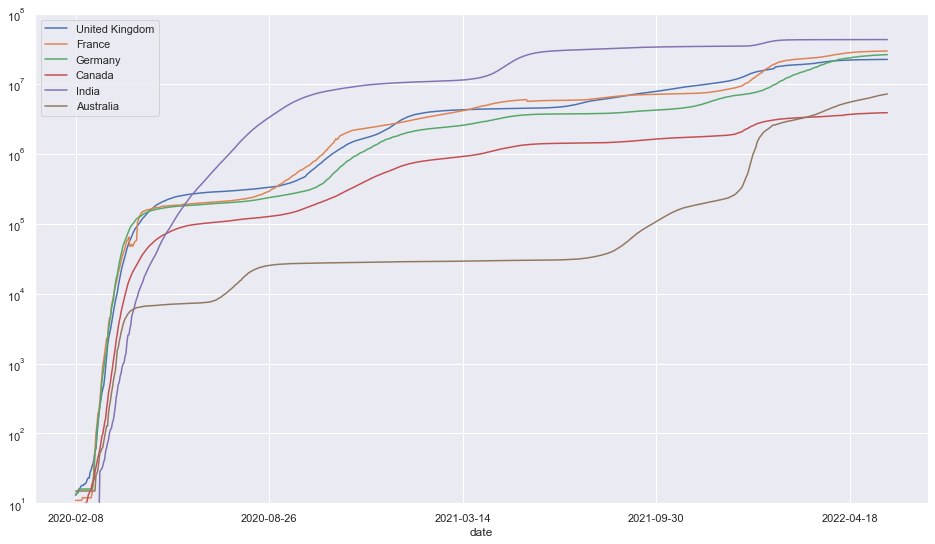

In [4]:
plt.figure();
ax=df_plot.iloc[17:,:].set_index('date').plot()
plt.ylim(10, 10**8)
ax.set_yscale('log')

In [5]:
import plotly
plotly.__version__


'5.6.0'

In [6]:
Country_list=['Germany','India','Australia']
fig=go.Figure()


In [7]:
import webbrowser as wb
chrome_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chrome.exe"
wb.register('chrome', None,wb.BackgroundBrowser(chrome_path))

In [8]:

for each in Country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,y=df_plot[each],
                                #mode='markers+lines',              
                                line_width=1,
                                marker_size=4, 
                                name=each
                                 )
                     )

fig.update_layout(
    width=1024,
    height=700,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
    title="Cases overtime of Covid infectors"
)
fig.update_yaxes(type="log",range=[1.1,8])
fig.update_layout(xaxis_rangeslider_visible=True)

#import webbrowser as wb

#fig.write_html( 'output_file_name.html', 
                   #auto_open=True )
fig.show(renderer='chrome')
#fig.show()

In [9]:
import dash
dash.__version__
from dash import dcc
from dash import html

In [10]:
app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='Country_drop_down',
        options=[
            {'label': 'Australia', 'value': 'Australia'},
            {'label': 'India', 'value': 'India'},
            {'label': 'Germany', 'value': 'Germany'},
            #{'label': 'Korea, South', 'value': 'Korea, South'}
        ],
        value=['India', 'Germany'], # which are pre-selected
        multi=True
    ),   
        
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [11]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('Country_drop_down', 'value')])
def update_figure(Country_list):
    
    traces = [] 
    for each in Country_list:
        traces.append(dict(x=df_plot.date,
                                y=df_plot[each],
                                #mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=4, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis_title="Time",
                yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"log",
                       'range':'[1.1,5.5]'
                      }
        )
    }

In [ ]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
